Original picture :


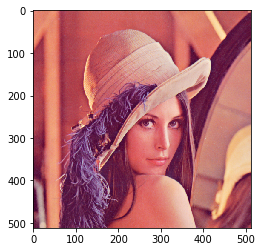

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# image path
img_path = 'lena.png'

# read the image in full color
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# show the image in RGB form:
def show_image_RGB(img_BGR):
    plt.imshow(cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB))
    plt.show()

print('Original picture :')
show_image_RGB(img)    

In [4]:
# give three pairs of points
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

rows, cols = img.shape[:2]
# affine transformation
M_rotate = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 0.5)
M_translate = np.array([[1, 0, 100], [0, 1, -50]], dtype=np.float32)
img_rotate = cv2.warpAffine(img, M_rotate, (cols, rows))
img_affine = cv2.warpAffine(img_rotate, M_translate, (cols, rows))

# pinpoint on the picture
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

Original picture :


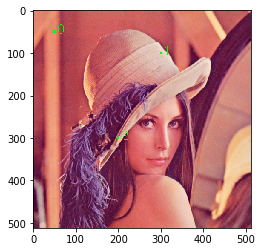

Affined picture :


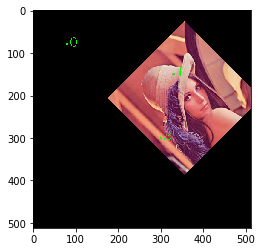

In [5]:
print('Original picture :')
show_image_RGB(img_copy)
print('Affined picture :')
show_image_RGB(img_affine)